<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/2409_%EA%B3%BC%EC%A0%9C_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CHAPTER9. 비지도학습**

사용할 수 있는 데이터는 대부분 레이블이 없다. 즉 입력 특성 X는 있지만 레이블 y는 없다.

제조 라인에서 제품의 사진을 받아 결함이 있는 제품을 감지하는 시스템을 만든다고 가정해보자. 자동으로 사진을 찍는 시스템을 만드는 것은 쉬우니 매일 수천 장의 사진을 얻을 수 있을 것이다. 몇 주 만에 아주 큰 데이터셋을 만들 수 있다. 제품에 결함이 있는지 아닌지 판단하는 이진 분류기를 만들려면 모든 사진마다 '결함' 또는 '정상'이라고 레이블을 부여해야 한다. 일반적으로는 사람이 이를 모두 수동으로 처리해야 한다. 그래서 보통 전체 사진 중 일부분만 작업하고 레이블된 데이터셋은 매우 작다. 당연히 분류기 성능이 좋지 못할 것이다. 또한 제품이 바뀔 때마다 전체 과정을 처음부터 다시 시작해야 한다.
* 군집 : 비슷한 샘플을 클러스터로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구이다.
* 이상치 탐지 : '정상' 데이터가 어떻게 보이는지 학습한다. 그다음 비정상 샘플을 감지하는 데 사용한다. 예를 들면 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾는다.
* 밀도 추정 : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다. 또한 데이터 분석과 시각화에도 유용하다.

먼저 k-평균과 DBSCAN을 사용해 군집부터 시작해보자. 그다음 가우시안 혼합 모델을 설명하고 어떻게 이를 밀도 추정, 군집, 이상치 탐지에 사용할 수 있는지 알아보자.

## **9.1 군집**
등산을 하며 이전에 본 적 없는 꽃을 발견했다고 해보자. 주위를 둘러보니 꽃이 몇 개 더 있다. 꽃들이 동일하지는 않지만 충분히 비슷해서 같은 종(또는 적어도 같은 속)에 속한다는 것을 알았다. 어떤 종인지 알려면 식물학자에게 물어봐야 하지만 비슷해 보이는 꽃을 모으기 위해서는 전문가가 필요하지 않다. 이를 군집이라고 부른다. 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업이다.

분류와 마찬가지로 각 샘플은 하나의 그룹에 할당된다. 하지만 분류와 달리 군집은 비지도 학습이다. [그림 9-1]을 살펴보자. 왼쪽은 붓꽃 데이터셋이다. 각 샘플의 품종 (즉, 클래스)이 구분되어 나타나 있다. 이 데이터셋은 레이블되어 있다. 로지스틱 회귀, SVM, 랜덤 포레스트 분류기 같은 분류 알고리즘이 잘 맞다. 오른쪽은 동일한 데이터셋이지만 레이블이 없다. 따라서 더는 분류 알고리즘을 사용할 수 없다. 군집 알고리즘이 필요한 경우이다. 대부분의 군집 알고리즘은 왼쪽 아래 클러스터를 쉽게 감지할 수 있다. 사람 눈으로도 쉽게 구분된다. 하지만 오른쪽 위의 클러스터는 두 개의 하위 클러스터로 구성되었는지 확실하지 않다. 사실 이 데이터셋은 이 그림에 없는 두 개의 특성 (꽃받침의 높이와 너비)이 더 있다. 모든 특성을 사용하면 사실 군집 알고리즘이 클러스터 세 개를 매우 잘 구분할 수 있다(예를 들어 가우시안 혼합 모델을 사용하면 150개 중 5개 샘플만 잘못된 클러스터로 할당된다).

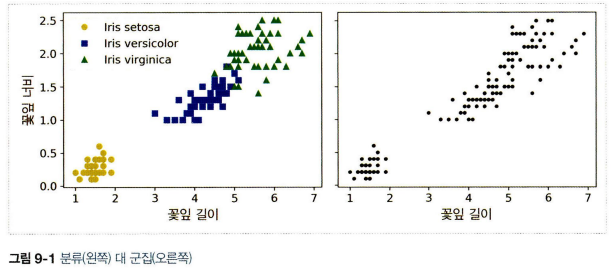

군집은 다음과 같은 다양한 애플리케이션에서 사용된다.
* 고객 분류 : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있다. 이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는 데 도움이 된다. 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있다. 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템을 만들 수 있다.
* 데이터 분석 : 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.
* 차원 축소 기법 : 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성을 측정할 수 있다(친화성은 샘플이 클러스터에 얼마나 잘 맞는지를 측정하낟). 각 샘플의 특성 벡터 x는 클러스터 친화성의 벡터로 바꿀 수 있다. k개의 클러스터가 있다면 이 벡터는 k차원이 된다. 이 벡터는 일반적으로 원본 특성 벡터보다 훨씬 저차원이다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있다.
* 이상치 탐지 : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있다. 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용하다. 또는 부정 거래 감지에 활용된다.
* 준지도 학습 : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상한다.
* 검색 엔진 : 일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아준다. 이런 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 한다. 비슷한 이미지는 동일한 클러스터에 속한다. 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾는다. 그다음 이 클러스터의 모든 이미지를 반환한다.
* 이미지 분할 : 색을 기반으로 픽셀을 클러스터로 모은다. 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이는 이미지에 있는 색상의 종류를 크게 줄인다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용한다.

클러스터에 대한 보편적인 정의는 없다. 실제로 상황에 따라 다르다. 알고리즘이 다르면 다른 종류의 클러스터를 감지한다. 어떤 알고리즘은 센트로이드라 부르는 특정 포인트를 중심으로 모인 샘플을 찾는다. 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾는다. 이런 클러스터는 어떤 모양이든 될 수 있다. 어떤 알고리즘은 계층적으로 클러스터의 클러스터를 찾는다. 종류는 아주 많다.

먼저 유명한 군집 알고리즘인 k-평균과 DBSCAN을 살펴보고 비선형 차원 축소, 준지도 학습, 이상치 탐지와 같은 애플리케이션을 알아본다.

### **9.1.1 k-평균**
[그림 9-2]와 같이 레이블 없는 데이터셋을 생각해보자. 샘플 덩어리 다섯 개가 잘 보인다. k-평균은 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘이다.

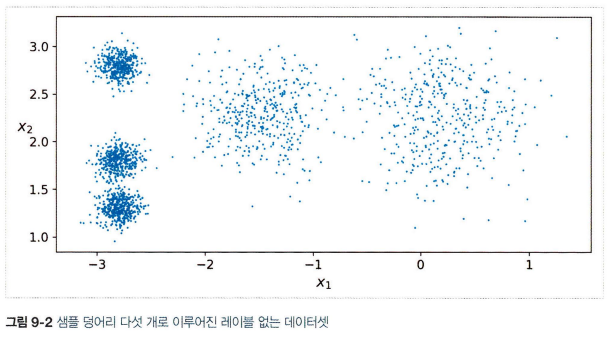

이 데이터셋에 k-평균 알고리즘을 훈련해보자. 이 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당한다.

In [2]:
# 데이터 불러오기
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

알고리즘이 찾을 클러스터 개수 k를 지정해야 한다. 이 예에서는 데이터를 보고 k를 5로 지정해야 한다고 알 수 있지만 이는 일반적으로 쉬운 일이 아니다.

각 샘플은 다섯 개의 클러스터 중 하나에 할당된다. 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스이다. KMeans 클래스의 인스턴스는 labels_ 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있다.

In [3]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

알고리즘이 찾은 센트로이드 다섯 개도 확인할 수 있다.

In [5]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다.

In [6]:
X_new=np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

클러스터의 결정 경계를 그려보면 보로노이 다이어그램을 얻을 수 있다(그림 9-3, 센트로이드는 x로 표시되어 있음).

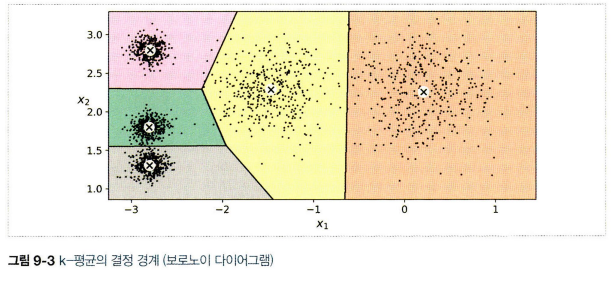

샘플은 대부분 적절한 클러스터에 잘 할당되었다. 하지만 샘플 몇 개는 레이블이 잘못 부여되었다(특히 왼쪽 위에 있는 클러스터와 가운데 클러스터의 경계 부근). 실제 k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문이다.

하드 군집이라는 샘플을 하나의 클러스터에 할당하는 것보다 클러스터마다 샘플에 점수를 부여하는 것이 유용할 수 있다. 이를 소프트 군집이라고 한다. 이 점수는 샘플과 센트로이드 사이의 거리가 될 수 있다.반대로 가우시안 방사기저 함수와 같은 유사도 점수가 될 수 있다. KMeans 클래스의 transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환한다.

In [7]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

이 예에서 X_new에 있는 첫 번째 샘플이 첫 번째 센트로이드에서 2.83, 두 번째 센트로이드에서 0.59, 세 번째 센트로이드에서 1.50, 네 번째 센트로이드에서 2.90, 다섯 번째 센트로이드에서 0.31 거리만큼 떨어져 있다. 고차원 데이터셋을 이런 방식으로 변환하면 k-차원 데이터셋이 만들어진다. 이 변환은 매우 효율적인 비선형 차원 축소 기법이 될 수 있다.

**k-평균 알고리즘**

그럼 알고리즘이 어떻게 작동하는 걸까? 센트로이드가 주어진다고 가정해보자. 데이터셋에 있는 모든 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다. 반대로 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플의 평균을 계산하여 모든 센트로이드를 쉽게 구할 수 있다. 하지만 레이블이나 센트로이드가 주어지지 않으면 어떻게 할까? 처음에는 센트로이드를 랜덤하게 선정한다(예를 들어 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 정한다). 그다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하고 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 센트로이드에 변화가 없을 때까지 계속한다. 이 알고리즘은 제한된 횟수 안에 수렴하는 것을 보장한다(일반적으로 이 횟수는 매우 작다). 무한하게 반복되지 않을 것이다.

센트로이드까지의 거리는 작을수록 해당 클러스터에 가깝고 유사도 점수는 높을수록 해당 클러스터에 가깝다. 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리가 매 단계마다 작아질 수밖에 없기 때문이다.

[그림 9-4]에서 이 알고리즘이 작동하는 것을 볼 수 있다. 처음에 센트로이드를 랜덤하게 초기화한다(왼쪽 위). 그다음 샌플에 레이블을 할당한다(오른쪽 위). 그다음 센트로이드를 업데이트한다(왼쪽 가운데). 샘플에 다시 레이블을 할당한다(오른쪽 가운데). 이렇게 반복한다. 여기서 볼 수 있듯이 반복 세 번 만에 이 알고리즘은 최적으로 보이는 클러스터에 도달했다.

이 알고리즘의 계산 복잡도는 일반적으로 샘플 개수 m, 클러스터 개수 k, 차원 개수 n에 선형적이다. 하지만 데이터가 군집할 수 있는 구조를 가질 때이다. 그렇지 않으면 최악의 경우 계산 복잡도는 샘플 개수가 지수적으로 급격히 증가할 수 있다. 실전에서 이런 일은 드물다. 일반적으로 k-평균은 가장 빠른 군집 알고리즘 중 하나이다.

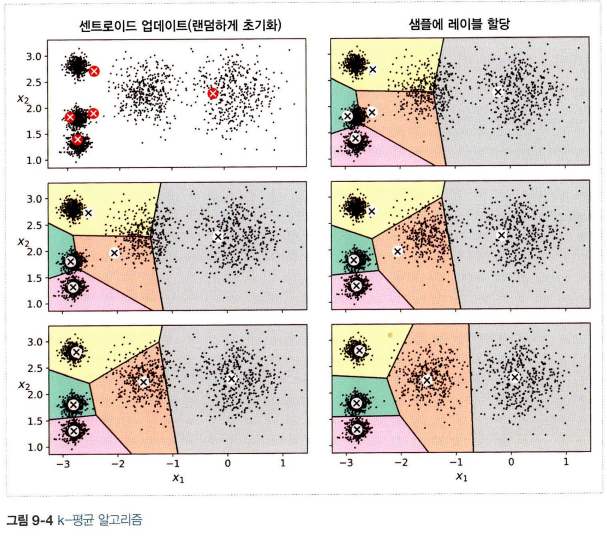

이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있다(즉 지역 최적점으로 수렴할 수 있다). 이 여부는 센트로이드 초기화에 달려 있다. [그림 9-5]는 랜덤한 초기화 단계에 운이 없을 때 알고리즘이 수렴할 수 있는 최적이 아닌 솔루션의 두 예이다.

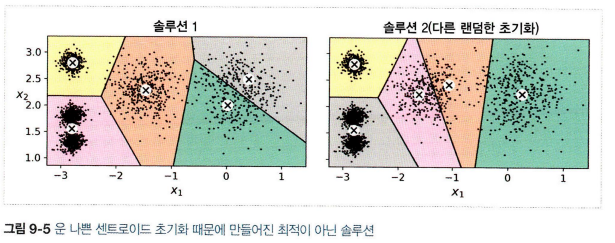

센트로이드 초기화를 개선하여 이런 위험을 줄일 수 있는 방법을 알아보자.

**센트로이드 초기화 방법**

센트로이드 위치를 근사하게 알 수 있다면 (예를 들어 또 다른 군집 알고리즘을 먼저 실해안다). `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 `n_init`를 1로 설정할 수 있다.

In [8]:
good_init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans=KMeans(n_clusters=5, init=good_init, n_init=1)

또 다른 방법은 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것이다. 랜덤 초기화 횟수는 `n_init` 매개변수로 조절한다. 기본값은 10이다. 이는 `fit()` 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻이다. 사이킷런은 이 중에 최선의 솔루션을 반환한다. 하지만 최선의 솔루션을 어떻게 알 수 있을까? 사용하는 성능 지표가 있다. 이 값은 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리이며 모델의 이너셔라고 부른다. [그림 9-5]의 왼쪽 모델의 이너셔는 대략 223.3이고 오른쪽에 있는 모델의 이너셔는 237.5이다. [그림 9-3]의 모델은 211.6이다. `KMeans` 클래스는 알고리즘을 `n_init`번 실행하여 이너셔가 가장 낮은 모델을 반환한다. 이 예에서는 (랜덤 초기화가 `n_init`번 연속으로 운이 나쁘지 않다면) [그림 9-3]에 있는 모델이 선택될 것이다. 이 값이 궁금하면 `inertia_` 인스턴스 변수로 모델의 이너셔를 확인할 수 있다.

In [9]:
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

211.59853725816828

`score()` 메서드는 이너셔의 음숫값을 반환한다. 예측기의 `score()` 메서드는 사이킷런의 '큰 값이 좋은 것이다'라는 규칙을 따라야 하기 때문이다. 한 예측기가 다른 것보다 좋다면 `score()` 메서드가 더 높은 값을 반환해야 한다.

In [10]:
kmeans.score(X)

-211.59853725816828

**k-평균 속도 개선과 미니배치 k-평균**

2010년 데이비드 스컬리의 논문에서 k-평균 알고리즘의 또 다른 중요한 변종이 제시되었다. 전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동한다. 이는 일반적으로 알고리즘의 속도를 3배에서 4배 정도 높인다. 또한 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있다. 사이킷런은 `MiniBatchKMeans` 클래스에 이 알고리즘을 구현했다. `KMeans` 클래스처럼 이 클래스를 사용할 수 있다.

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans=MiniBatchKMeans(n_clusters=5, n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto')

데이터셋이 메모리에 들어가지 않으면 가장 간단한 방법은 점진적 PCA에서 했던 것처럼 `memmap` 클래스를 사용하는 것이다. 또는 `MiniBatchKMeans` 클래스의 `partial_fit()` 메서드에 한 번에 하나의 미니배치를 전달할 수 있다. 하지만 초기화를 여러 번 수행하고 만들어진 결과에서 가장 좋을 것을 직접 골라야 해서 해야 할 일이 많다,

미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다. 특히 클러스터의 개수가 증가할 때 그렇다. 이를 [그림 9-6]에서 볼 수 있다. 왼쪽의 그래프는 여러 가지 클러스터 개수 k를 사용해 앞선 데이터셋에서 훈련한 미니배치 k-평균과 일반 k-평균 모델의 이너셔를 비교한 것이다. 두 곡선의 차이는 상당히 일정하게 유지되지만 k가 증가함에 따라 이너셔가 점점 줄어들기 때문에 이 차이가 차지하는 비율은 점점 커진다. 오른쪽 그래프에서 미니배치 k-평균이 일반 k-평균보다 훨씬 빠르고 k가 증가함에 따라 더 커지는 것을 볼 수 있다.

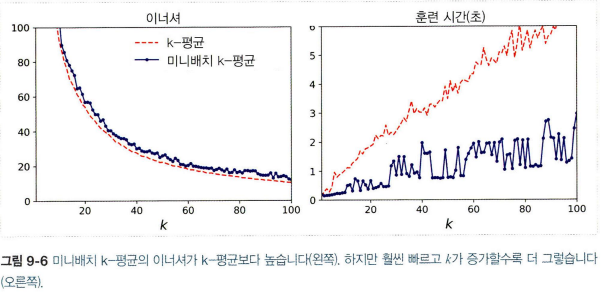

**최적의 클러스터 개수 찾기**

지금까지 클러스터 개수 k를 5로 지정했다. 데이터를 볼 때 이 값이 올바른 클러스터 개수임이 분명하기 때문이다. 하지만 일반적으로 k를 어떻게 설정할지 쉽게 알 수 없다. 만약 올바르게 지정하지 않으면 결과는 매우 나쁠 수 있다. [그림 9-7]에서 보듯이 k를 3이나 8로 지정하면 상당히 나쁜 모델이 만들어진다.

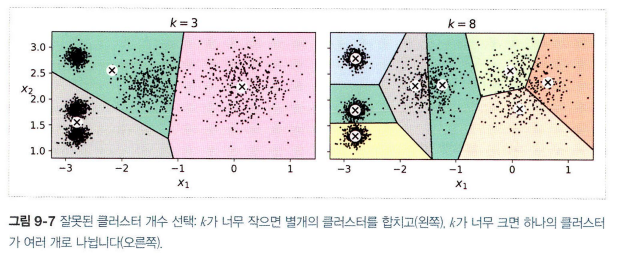

k=3일 때 이너셔는 653.2이고 이는 k=5일 때(211.6)보다 높다. 하지만 k=8일 때 이너셔는 119.1이다. 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아니다. 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 된다. 따라서 이너셔는 더 작아질 것이다. 이너셔를 k의 함수로 그래프를 그려보자(그림 9-8).

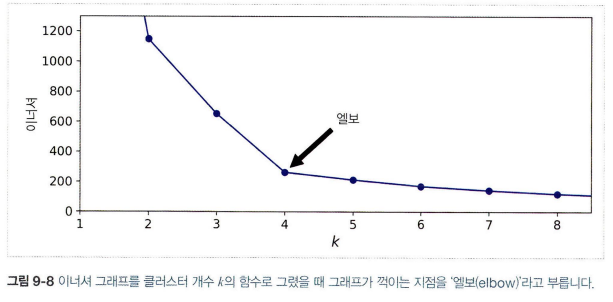

그림에서 보듯이 이너셔는 k가 4까지 증가할 때 빠르게 줄어든다. 하지만 k가 계속 증가하면 이너셔는 훨씬 느리게 감소한다. 이 그래프를 팔의 형태와 비슷하게 보면 k=4 지점이 엘보이다. 따라서 k에 대한 정답을 모른다면 4는 좋은 선택이 된다. 이보다 작은 값은 변화가 심하고 더 큰 값은 크게 도움이 되지 않는다. 어쩌면 완벽한 클러스터를 아무 이유 없이 반으로 나누었는지도 모른다.

최선의 클러스터 개수를 선택하는 이 방법은 너무 엉성하다. 더 정확한 방법은 실루엣 점수이다. 이 값은 모든 샘플에 대한 실루엣 계수의 평균이다. 샘플의 실루엣 계수는 (b-a)/max(a, b)로 계산한다. 여기에서 a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리이다(즉 클러스터 내부의 평균 거리). b는 가장 가까운 클러스터까지 평균 거리이다(즉 가장 가까운 클러스터의 샘플까지 평균 거리. 샘플과 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터이다). 실루엣 계수는 -1에서 +1까지 바뀔 수 있다. +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 뜻이다. 실루엣 계수가 0에 가까우면 클러스터 경계에 위치한다는 의미이고 -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미이다.

실루엣 점수를 계산하려면 사이킷런의 `silhouette_score()` 함수를 사용한다. 데이터셋에 있는 모든 샘플과 할당된 레이블을 전달한다.

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

클러스터 개수를 달리하여 실루엣 점수를 비교해보자(그림 9-9).

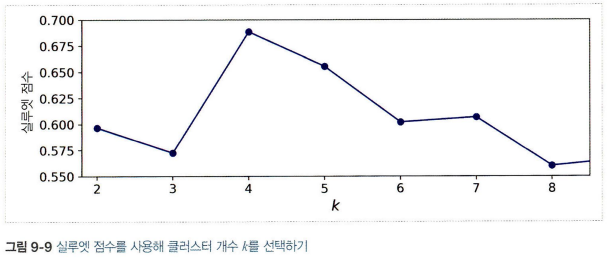

여기서 볼 수 있듯이 이 그래프는 이전보다 훨씬 많은 정보를 준다. k=4가 좋은 선택이지만 k=5도 꽤 좋다는 사실을 잘 보여준다. 특히 k=6이나 7보다 훨씬 좋다. 이는 이너셔를 비교했을 때는 드러나지 않았다.

모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그러면 더 많은 정보가 있는 그래프를 얻을 수 있다. 이를 실루엣 다이어그램이라고 한다(그림 9-10). 클러스터마다 칼 모양의 그래프가 그려진다. 이 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수를 의미하고 너비는 이 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타낸다(넓을수록 좋다).

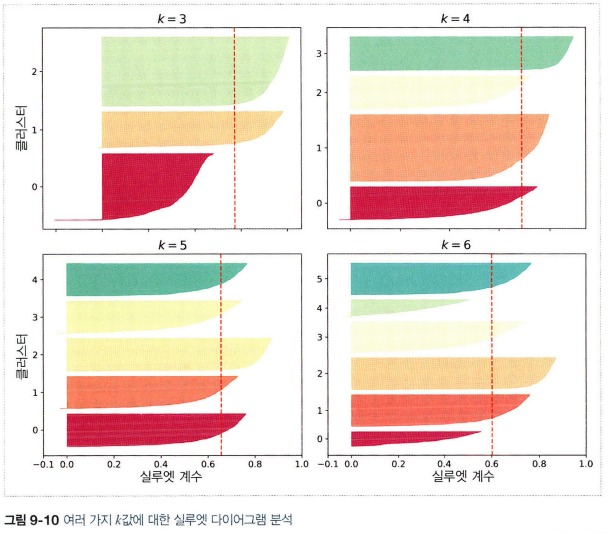

수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수를 나타낸다. 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면(즉 많은 샘플이 파선의 왼쪽에서 멈추면) 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미하므로 나쁜 클러스터이다. k=3과 k=6에서 이런 나쁜 클러스터를 볼 수 있다. 하지만 k=4나 k=5일 때는 클러스터가 상당히 좋아 보인다. 대부분의 샘플이 파선을 넘어서 뻗어 있고 1.0에 근접해 있다. k=4일 때 인덱스 1의(위에서부터 세 번째) 클러스터가 매우 크다. k=5일 때는 모든 클러스터의 크기가 비슷하다. 따라서 k=4일 때 전반적인 실루엣 점수가 k=5보다 조금 높더라도 비슷한 크기의 클러스터를 얻을 수 있는 k=5를 선택하는 것이 좋다.

### **9.1.2 k-평균의 한계**

k-평균은 속도가 빠르고 확장이 용이하다. 그렇지만 k-평균이 완벽한 것은 아니다. 앞에서 보았듯이 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 한다. 또한 클러스터 개수를 지정해야 한다. 꽤 번거로운 작업일 수 있다. 또한 k-평균은 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다. 예를 들어 [그림 9-11]은 크기와 밀집도, 방향이 다른 세 개의 타원형 클러스터를 가진 데이터셋을 k-평균이 어떻게 군집하는지 보여준다.

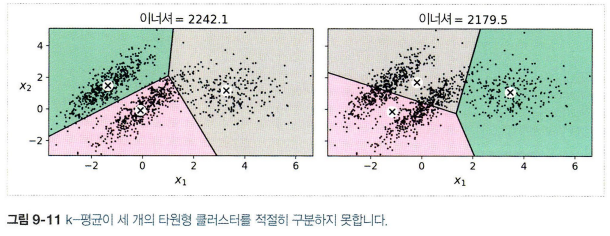

여기서 볼 수 있듯이 이 솔루션들은 모두 좋지 않다. 왼쪽 솔루션이 더 낫지만 가운데 클러스터의 25% 정도가 오른쪽 클러스터로 할당되었다. 오른쪽 솔루션은 이너셔가 더 작지만 끔찍한 수준이다. 데이터에 따라서 잘 수행할 수 있는 군집 알고리즘이 다르다. 이런 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

k-평균을 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요하다. 그렇지 않으면 클러스터가 길쭉해지고 k-평균의 결과가 좋지 않다. 특성의 스케일을 맞추어도 모든 클러스터가 잘 구분되고 원형을 형태를 가진다고 보장할 수는 없지만 일반적으로 더 좋아진다.

이제 군집에서 도움을 받을 수 있는 몇 가지 방법을 살펴보자. k-평균을 사용하지만 다른 군집 알고리즘으로 자유롭게 실험해 보자.

### **9.1.3 군집을 사용한 이미지 분할**

이미지 분할은 이미지를 세그먼트 여러 개로 분할하는 작업이다. 시맨틱 문할에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다. 예를 들어 자율 주행 자동차의 비전 시스템에서 보행자 이미지를 구성하는 모든 픽셀은 '보행자' 세그먼트에 할당될 것이다. 이 경우 각 보행자는 다른 세그먼트가 될 수 있다. 시맨틱 또는 인스턴스 분할에서 최고 수준의 성능을 내려면 합성곱 신경망을 사용한 복잡한 모델을 사용해야 한다. 여기서는 훨씬 쉬운 작업인 색상 분할을 수행해보겠다. 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당할 것이다. 어떤 애플리케이션에서는 이 정도로 충분할 수 있다. 예를 들어 인공위성 사진을 분서갛여 한 지역의 전체 산림 면적이 얼마나 되는지 측정하려면 색상 분할로 충분하다.

먼저 맷플롯립의 `imread()` 함수를 사용해 이미지를 읽어보자([그림 9-12]의 왼쪽 위 이미지 참조).

In [104]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = plt.imread("/content/drive/MyDrive/24-1/ESAA/과제/ladybug.png")
image.shape

(533, 800, 3)

이 이미지는 3D 배열로 표현된다. 첫 번째 차원의 크기가 높이이고 두 번째는 너비, 세 번째는 컬러 채널 개수이다. 여기에서는 빨강, 초록, 파랑(RGB) 채널이 있다. 다른 말로 하면 각 픽셀에 대해 빨강, 초록, 파랑의 강도를 담은 3D 벡터가 있다. 이 값은 0.0과 1.0 사이이다(`imageio.imread()`를 사용하면 0과 255 사이이다). 어떤 이미지는 더 적은 채널을 가진다. 예를 들면 흑백 이미지이다(채널이 하나이다). 어떤 이미지는 어 많은 채널을 가진다. 예를 들면 투명도를 위해 알파 채널을 가진 이미지나 위성 이미지이다. 위성 이미지는 종종 여러 전자기파에 대한 채널을 포함한다(예를 들면 적외선). 다음 코드는 이 배열을 RGB 색상의 긴 리스트로 변환한 다음 k-평균을 사용해 이 색상을 클러스터로 모은다.

In [105]:
X=image.reshape(-1, 3)
kmeans=KMeans(n_clusters=8, n_init=10).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)

예를 들어 모든 초록색을 하나의 컬러 클러스터로 만들 수 있다. 그다음 각 색상에 대해 (예를 들어 검은 초록) 그 픽셀의 컬러 클러스터의 평균 컬러를 찾는다. 예를 들어 모든 초록색은 모두 밝은 초록색으로 바뀔 수 있다(초록 클러스터의 평균 색이 밝은 초록이라고 가정한다). 마지막으로 이 긴 색상의 리스트를 원본 이미지와 동일한 크기로 바꾼다.

이렇게 하면 [그림 9-12]의 오른쪽 위에 보이는 이미지를 출력한다. 그림처럼 클러스터 개수를 여러 개로 바꿔 테스트할 수 있다. 8개보다 클러스터 개수를 작게 하면 무당벌레의 화려한 빨간색이 독자적인 클러스터를 갖지 못하고 주위 색에 합쳐진다. 이는 k-평균이 비슷한 크기의 클러스터를 만드는 경향이 있기 때문이다. 무당벌레는 이미지의 나머지 부분보다 훨씬 작기 때문에 화려한 색을 가지고 있더라도 k-평균이 무당벌레를 하나의 클러스터로 만들지 못한다.

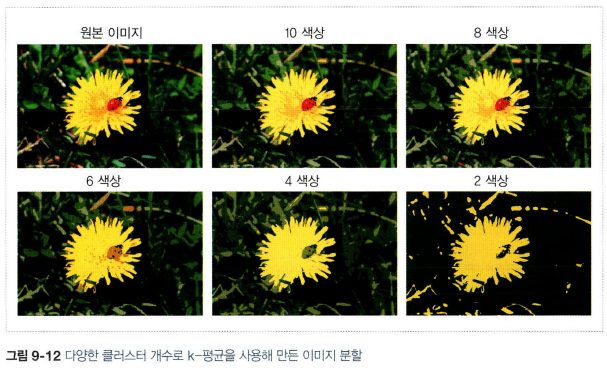

In [106]:
from sklearn.datasets import load_digits
X_digits, y_digits=load_digits(return_X_y=True)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_digits, y_digits)

In [108]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [109]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [35]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ('kmeans', KMeans(n_clusters=50, n_init=10)),
    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init='auto')),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [36]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid=dict(kmeans__n_clusters=range(2, 100))
grid_clf=GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto')),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [38]:
grid_clf.best_params_

{'kmeans__n_clusters': 93}

In [39]:
grid_clf.score(X_test, y_test)

0.9711111111111111

In [110]:
n_labeled=50
log_reg=LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, random_state=42)

In [111]:
log_reg.score(X_test, y_test)

0.8155555555555556

In [120]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

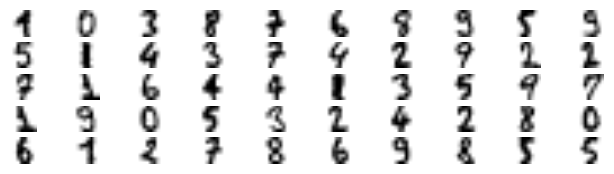

In [121]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
  plt.axis('off')
plt.show()

In [122]:
y_representative_digits=np.array([1, 0, 3, 8, 7, 6, 8, 9, 5, 3, 5, 1, 4, 3, 7, 4, 2, 9, 1, 1, 7, 1, 6, 4, 4, 1, 3, 5, 9, 7, 1, 9, 0, 5, 3, 2, 4, 2, 8, 0, 6, 1, 2, 7, 8, 6, 9, 8, 5, 5])

In [123]:
log_reg=LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8466666666666667

In [124]:
y_train_propagated=np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [125]:
log_reg=LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8844444444444445

In [126]:
percentile_closest=20

X_cluster_dist=X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster=(kmeans.labels_==i)
  cluster_dist=X_cluster_dist[in_cluster]
  cutoff_distance=np.percentile(cluster_dist, percentile_closest)
  above_cutoff=(X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff]=-1

partially_propagated=(X_cluster_dist != -1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train_propagated[partially_propagated]

In [127]:
log_reg=LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8911111111111111

In [128]:
np.mean(y_train_partially_propagated==y_train[partially_propagated])

0.9372822299651568

In [129]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y=make_moons(n_samples=1000, noise=0.05)
dbscan=DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [130]:
dbscan.labels_

array([ 0,  1,  2, -1,  3,  1,  1,  4,  3,  1,  2,  3,  0,  2,  1,  1,  3,
        1, -1, -1,  3,  3,  5,  1, -1,  6,  6,  2,  7,  0,  2,  0,  2,  2,
        8,  3,  5,  2,  5,  1,  6,  0,  1,  1,  5,  2, 12,  0, -1,  2,  9,
        0,  4,  0, 12,  2,  1,  1,  6,  2,  6, 10,  9,  9,  2,  6,  4,  1,
       -1,  0,  1,  2,  1,  5,  2, 11, -1,  0,  2,  2,  2,  2,  1, 12, -1,
        6,  2,  4,  1,  7,  1,  4,  2, 10,  4,  6,  6,  2,  0, -1,  1,  2,
       -1,  1,  1,  2, -1,  2, 10,  9,  0, 10, -1,  9,  0,  0, 10,  0,  6,
        9,  2,  2,  3,  1,  0,  1,  6,  6, 10,  5, -1,  5, -1, -1,  0, 10,
        3, 10,  0,  2,  1, -1,  3, -1,  7,  9,  4,  2,  1,  7,  0, -1,  6,
       12,  3,  3, -1,  1,  1,  6,  1,  5, 10,  2,  2,  2,  3,  0, -1, 10,
        4,  8, 10,  6,  4,  4,  0,  4,  2,  3,  1,  5,  9,  0,  0,  1,  0,
        4,  1,  0, 11,  7,  9,  1,  2,  6,  4,  3,  5,  9,  1,  3,  4,  9,
        1,  9,  1,  7,  9,  7,  2,  0,  6,  2, 10, 12,  2,  9,  2,  2,  9,
        2,  1,  5,  1,  4

In [131]:
len(dbscan.core_sample_indices_)

799

In [132]:
dbscan.core_sample_indices_

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        16,  17,  20,  21,  22,  23,  26,  27,  28,  29,  30,  31,  32,
        34,  35,  36,  37,  39,  40,  41,  42,  45,  49,  50,  51,  52,
        53,  55,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  69,
        70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,  82,  83,
        85,  86,  87,  89,  90,  91,  92,  93,  94,  95,  98, 100, 103,
       104, 105, 107, 108, 109, 110, 111, 113, 114, 116, 117, 119, 120,
       121, 122, 123, 124, 125, 126, 128, 129, 131, 135, 136, 137, 138,
       139, 140, 142, 144, 145, 146, 147, 148, 150, 152, 154, 155, 157,
       158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213,
       214, 215, 217, 218, 219, 220, 221, 222, 223, 225, 226, 22

In [133]:
dbscan.components_

array([[ 1.32324165, -0.4516854 ],
       [-0.64828182,  0.78170543],
       [ 0.02822987,  0.08454957],
       ...,
       [ 1.02372894,  0.11007798],
       [ 0.46571441,  0.83520866],
       [-1.01508328,  0.1027881 ]])

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [135]:
X_new=np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 2, 6, 3])

In [136]:
knn.predict_proba(X_new)

array([[0.  , 0.86, 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.96, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.02, 0.  ],
       [0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.8 , 0.12, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]])

In [137]:
y_dist, y_pred_idx=knn.kneighbors(X_new, n_neighbors=1)
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  2,  6, -1])

In [138]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [139]:
gm.weights_

array([0.55298588, 0.21932611, 0.22768801])

In [140]:
gm.means_

array([[ 0.50891631,  0.23655004],
       [ 1.71115832, -0.08285346],
       [-0.68377007,  0.60104585]])

In [141]:
gm.covariances_

array([[[ 0.14805618, -0.07558362],
        [-0.07558362,  0.27243988]],

       [[ 0.06951523,  0.07239706],
        [ 0.07239706,  0.09213528]],

       [[ 0.0788432 ,  0.07840495],
        [ 0.07840495,  0.09428694]]])

In [142]:
gm.converged_

True

In [143]:
gm.n_iter_

12

In [144]:
gm.predict(X)

array([1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1,

In [145]:
gm.predict_proba(X)

array([[1.13979278e-001, 8.86020722e-001, 4.53525775e-135],
       [9.65890470e-003, 5.41963840e-161, 9.90341095e-001],
       [1.00000000e+000, 1.38256978e-056, 2.91444345e-021],
       ...,
       [1.00000000e+000, 1.37833760e-068, 1.01843263e-014],
       [1.49078030e-004, 5.70474230e-142, 9.99850922e-001],
       [1.00000000e+000, 4.66348152e-041, 7.57685163e-032]])

In [146]:
X_new, y_new=gm.sample(6)
X_new

array([[ 1.54886883e-03,  1.31205358e+00],
       [ 2.58603515e-01, -3.80626595e-02],
       [ 1.81383837e+00, -9.97569140e-02],
       [ 1.67823303e+00,  9.67007960e-03],
       [ 1.37987183e+00, -5.16803013e-01],
       [ 1.77750697e+00,  9.66978749e-02]])

In [147]:
y_new

array([0, 0, 1, 1, 1, 1])

In [148]:
gm.score_samples(X)

array([-0.9751762 , -0.63555517, -1.86664974, -2.16019755, -0.48109405,
       -0.59011048, -1.54175196, -2.12240208, -0.65233384, -0.84003616,
       -1.54970334, -1.30811831, -0.88747371, -1.56874945, -0.79466735,
       -0.13231874, -0.54640575, -0.1276097 , -2.18210646, -1.71147942,
       -0.6432726 , -0.37012772, -1.58087233, -0.13331751, -1.86765533,
       -1.32500947, -1.31052818, -1.5084623 , -2.02425855, -2.16795623,
       -1.62441252, -1.81295546, -1.36049267, -1.82621452, -1.82759422,
       -0.4734828 , -1.4794361 , -1.77867342, -1.66508471, -0.69904655,
       -1.67810675, -0.1895755 , -0.49032799, -1.09660973, -1.35897283,
       -1.52777784, -1.75187583, -1.92368391, -2.35929808, -1.58932466,
       -1.64533113, -2.17119284, -1.57897962, -0.49920372, -1.84216743,
       -1.6167587 , -1.02422481, -0.50276365, -1.81225833, -1.68463768,
       -1.60278704, -1.85994908, -1.37215322, -1.76550651, -1.45591035,
       -1.83121946, -2.13611628, -0.26812625, -0.0991236 , -0.99

In [149]:
densities=gm.score_samples(X)
density_threshold=np.percentile(densities, 4)
anomalies=X[densities<density_threshold]

In [150]:
gm.bic(X)

2776.781633050396

In [151]:
gm.aic(X)

2693.3497933076997

In [152]:
from sklearn.mixture import BayesianGaussianMixture
bgm=BayesianGaussianMixture(n_components=10, n_init=10, max_iter=500)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.14, 0.13, 0.12, 0.16, 0.1 , 0.12, 0.  , 0.12, 0.11, 0.  ])